<img src="https://github.com/KartikNW/MSDS_458_Public/blob/main/images2/NorthwesternHeader.png?raw=1" />

# Assignment 01 – Diamonds Regression

In this assignment, we use the **Seaborn Diamonds dataset**, which contains detailed information on **53,940 diamonds**, including attributes such as **carat**, **cut**, **color**, **clarity**, **depth**, **table**, and **price**. The goal is to build and evaluate deep learning models that can **predict a diamond’s price** based on its physical and categorical characteristics.

The notebook walks through the **end-to-end regression workflow**, including:

- Loading and exploring the dataset to understand key features and distributions  
- Performing **data preprocessing**, including normalization, encoding of categorical variables, and train/validation/test splits  
- Building a **neural network regression model** using TensorFlow/Keras  
- **Training, evaluating, and tuning** the model to minimize prediction error  
- Visualizing results through **loss curves and predicted vs. actual price plots** to assess model performance  

By the end of this assignment, you will gain hands-on experience applying deep learning techniques to a real-world structured dataset and interpreting model outputs for a regression problem.


## Import Required Libraries

In this section, we import the essential Python libraries needed for data manipulation, visualization, and building deep learning models.  

- **Pandas** and **NumPy** are used for data handling and numerical computations.  
- **Matplotlib** and **Seaborn** help visualize feature distributions and model performance.  
- **TensorFlow** and **Keras** are used to construct, train, and evaluate the neural network regression model.  
- A private helper module, **`diamonds_utils.py`**, is also imported. This module contains utility functions that simplify repetitive tasks such as data preprocessing, visualization, and evaluation—making the notebook cleaner and easier to follow.  

> ⚠️ **Note:** The `diamonds_utils.py` file is not part of the standard library and must be downloaded from the course GitHub repository before running this notebook.



In [ ]:
import os, sys, importlib.util, urllib.request

IN_COLAB = 'google.colab' in sys.modules
UTILS_PATH = 'diamonds_utils.py'

def fetch_github_raw(user, repo, branch, file_path, local_path):
    url = f"https://raw.githubusercontent.com/{user}/{repo}/{branch}/{file_path}"
    urllib.request.urlretrieve(url, local_path)
    print(f"Fetched {file_path} from branch '{branch}'.")

if IN_COLAB and not os.path.exists(UTILS_PATH):
    fetch_github_raw("kartikNW", "MSDS_458_Public", "future", 
                     "MSDS458_Assignment_01/diamonds_utils.py", UTILS_PATH)
else:
    print("Using local diamonds_utils.py")

Using local diamonds_utils.py


In [2]:
# Set the environment variable to disable GPU
os.environ['DIAMONDS_DISABLE_GPU'] = '1'

In [3]:
import numpy as np
import tensorflow as tf
from packaging import version

from diamonds_utils import (
    load_data,
    display_data_info,
    analyze_categorical_variables,
    analyze_price_distribution,
    analyze_carat_price_relationship,
    analyze_cut_impact,
    analyze_correlations,
    prepare_data,
    train_model,
    plot_training_history,
    plot_percentage_error_by_price,
    evaluate_model,
    residual_plot,
    remove_specific_outliers
)

/Users/kartikshridhar/gitrepos/personal/MSDS_458_Collab/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Version Requirements

This assignment requires recent versions of **Python** and **TensorFlow/Keras** to ensure compatibility with the neural network code.  

| Library | Minimum Version | Purpose |
|----------|------------------|----------|
| Python | 3.10 | Core language |
| TensorFlow / Keras | 2.15 | Deep learning framework |

If you're running this notebook locally, you can verify your setup using the code cell below.


In [4]:
print("Python version:", sys.version.split()[0])
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

# Minimum version requirements
min_versions = {
    "Python": "3.10",
    "TensorFlow": "2.15",
    "Keras": "3.0",
}

def check_version(name, current, minimum):
    if version.parse(current) < version.parse(minimum):
        print(f"⚠️ {name} version {current} < required {minimum}. Please upgrade.")

check_version("Python", sys.version.split()[0], min_versions["Python"])
check_version("TensorFlow", tf.__version__, min_versions["TensorFlow"])
check_version("Keras", tf.keras.__version__, min_versions["Keras"])

Python version: 3.9.6
TensorFlow version: 2.19.0
Keras version: 3.10.0
⚠️ Python version 3.9.6 < required 3.10. Please upgrade.


## Load and Display Data

First, let's load the dataset and display its basic information.

In [5]:
# Load the dataset
diamonds = load_data()

# Display basic information
display_data_info(diamonds)




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None

First 5 rows of the dataset:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I   

## Exploratory Data Analysis (EDA)

In this section, we explore the **Seaborn Diamonds dataset** to better understand the features that influence diamond pricing.  
The goal of EDA is to identify key relationships, detect patterns, and spot potential data quality issues before modeling.

The notebook guides you through:
- Viewing the first few rows of the dataset to understand its structure and column types  
- Checking for **missing values** and **basic statistics** using `info()` and `describe()`  
- Visualizing key numerical features such as **carat**, **depth**, **table**, and **price**  
- Examining categorical features like **cut**, **color**, and **clarity** using **count plots** and **box plots** to see how they relate to price  
- Using **pairplots** or **correlation heatmaps** to highlight relationships between numerical variables  

---

### 💡 Suggestions for Further Exploration
If you want to go a step further, you could also:
- Investigate **outliers** in `price` or `carat` (e.g., via boxplots or z-scores)  
- Explore **interactions between features** such as `carat × clarity` or `color × cut` and their combined effect on price  
- Analyze whether **feature distributions differ** significantly across categories (e.g., does “Ideal” cut always correspond to higher carat weights?)  
- Try **log-transforming the price variable** to see if it reduces skewness  
- Examine **correlation between numerical variables** using a heatmap to decide which features may carry redundant information  

By performing these additional analyses, you can gain deeper insight into the dataset and make more informed choices during feature preprocessing and model design.



CUT Distribution:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


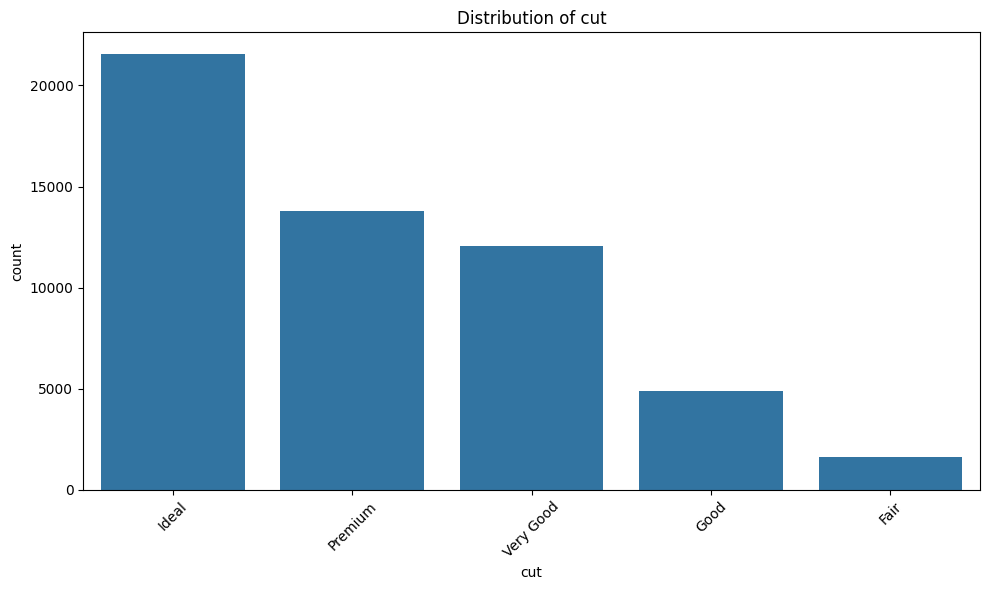


COLOR Distribution:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


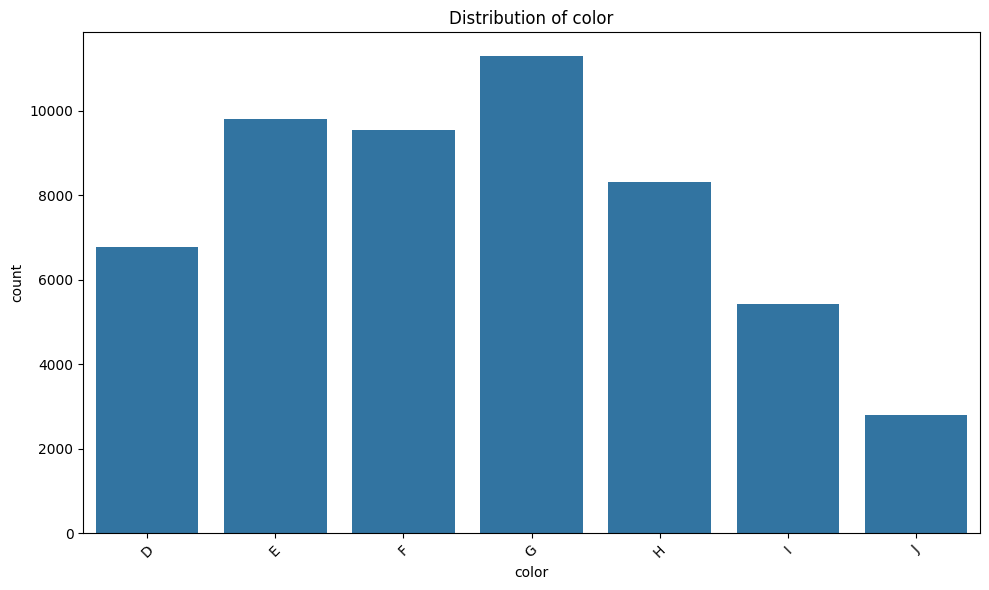


CLARITY Distribution:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


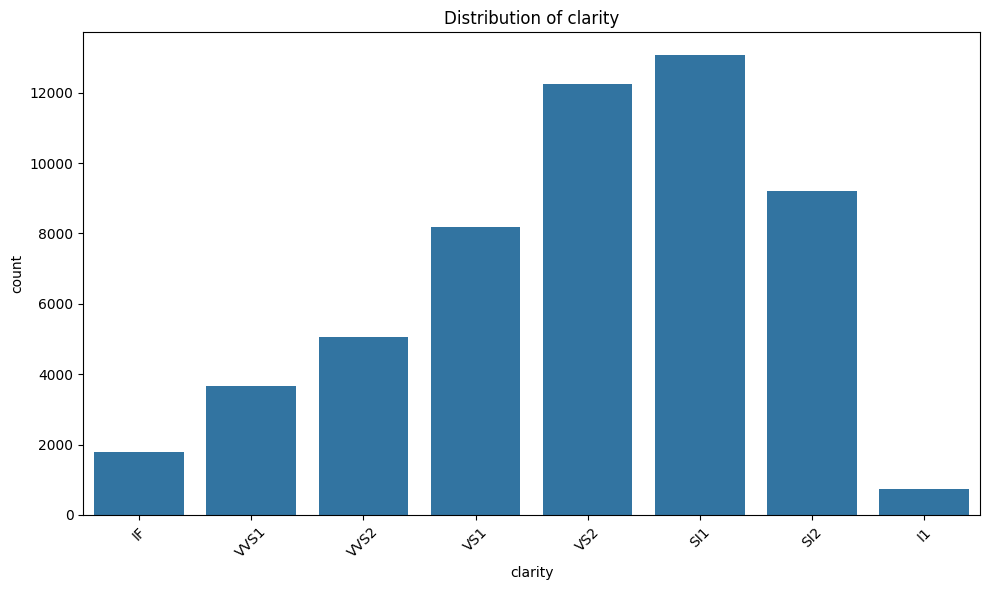

In [6]:
# Analyze categorical variables
analyze_categorical_variables(diamonds)

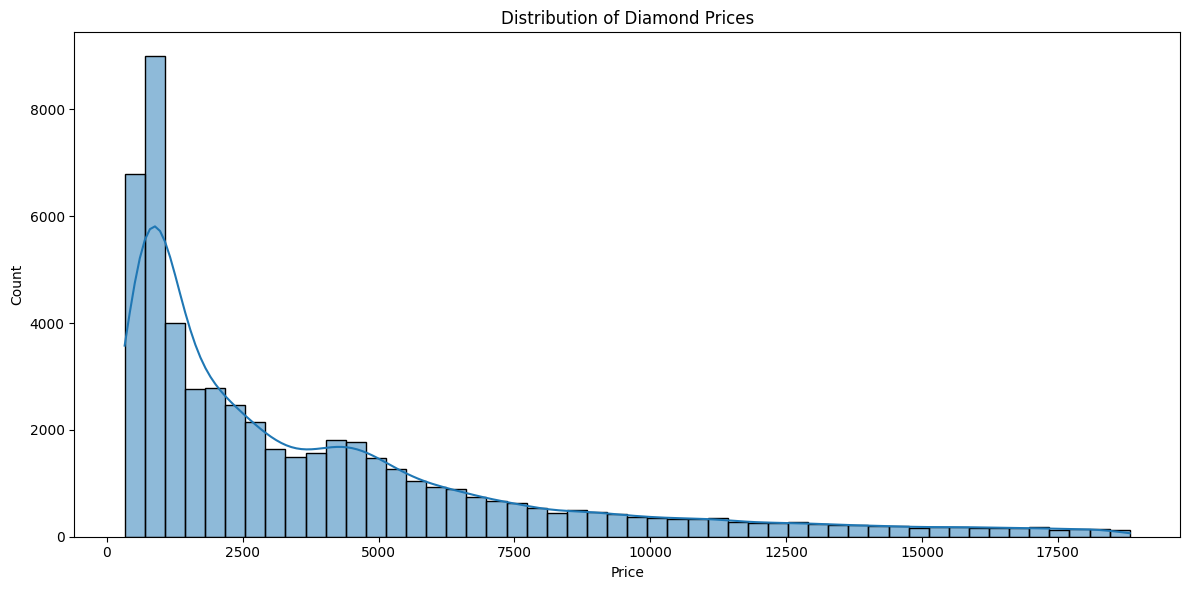


Price Statistics:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64


In [7]:
# Analyze price distribution
analyze_price_distribution(diamonds)

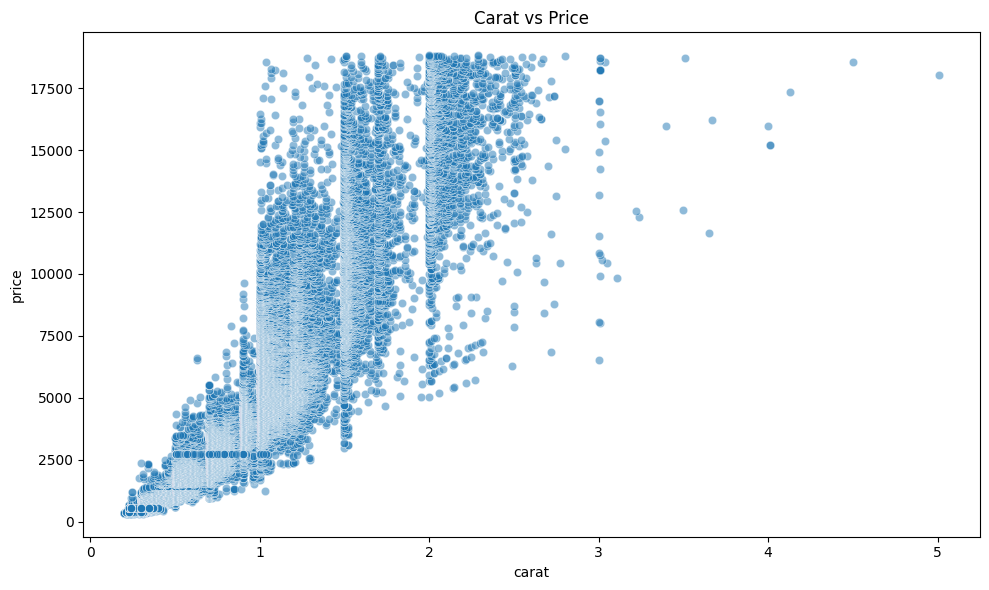


Correlation between carat and price: 0.922


In [8]:
# Analyze carat-price relationship
analyze_carat_price_relationship(diamonds)

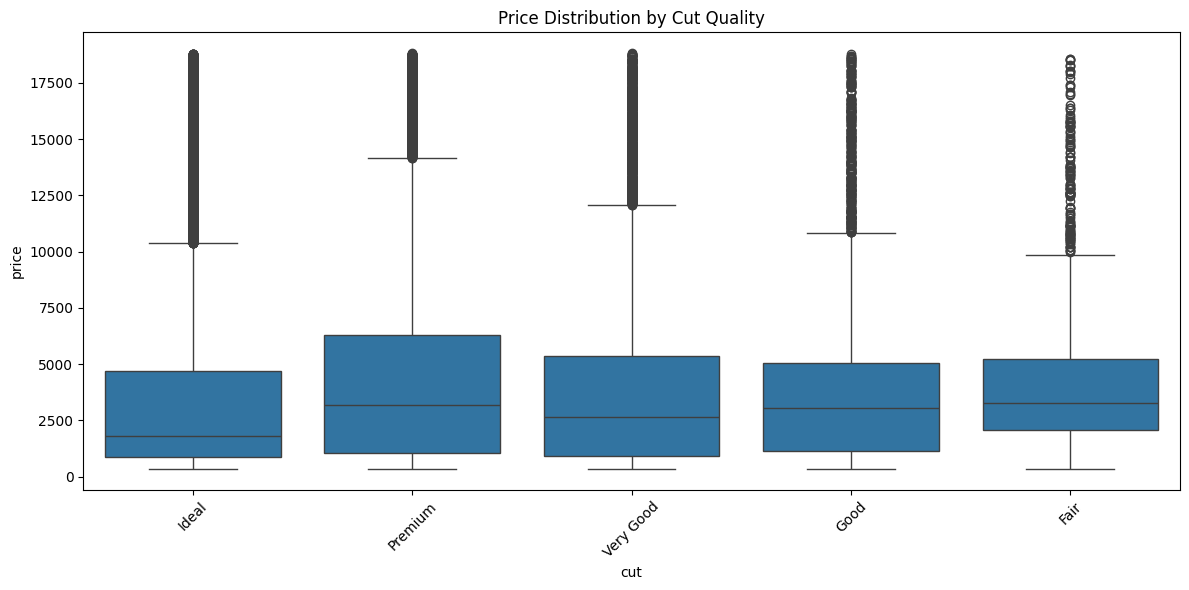


Average Price by Cut:
cut
Premium      4584.257704
Fair         4358.757764
Very Good    3981.759891
Good         3928.864452
Ideal        3457.541970
Name: price, dtype: float64


/Users/kartikshridhar/gitrepos/personal/MSDS_458_Collab/MSDS458_Assignment_01/diamonds_utils.py:147: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(diamonds.groupby('cut')['price'].mean().sort_values(ascending=False))


In [9]:
# Analyze cut impact on price
analyze_cut_impact(diamonds)

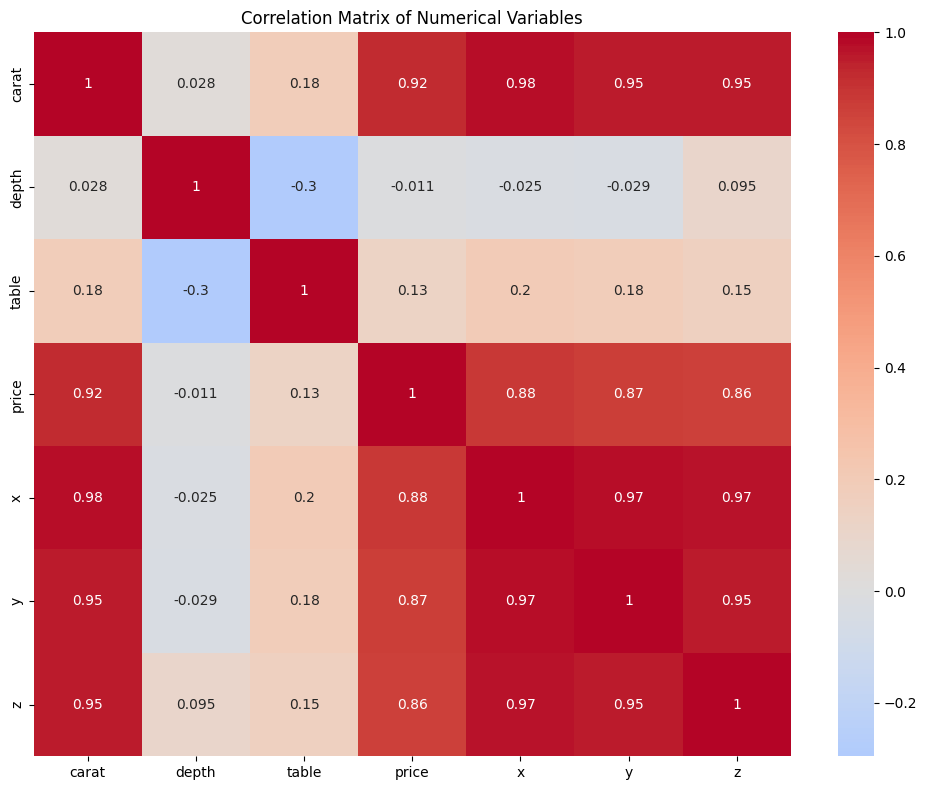

In [10]:
# Analyze correlations
analyze_correlations(diamonds)

## Remove Outliers

In this step, we remove a small number of clearly invalid or extreme records (e.g., zero or unrealistic dimensions) to ensure the dataset is clean before modeling.

### 💡 Suggestions for Further Exploration
- Explore additional outlier detection methods such as **IQR filtering** or **z-scores**  
- Compare model performance **before and after** removing outliers  
- Visualize potential outliers using **boxplots** or **scatter plots** (e.g., carat vs. price)  
- Consider **transforming** rather than removing outliers (e.g., log transformation) for highly skewed features  


In [11]:
# Remove outliers
diamonds = remove_specific_outliers(diamonds)

Before removing specific outliers: (53940, 10)
After removing specific outliers: (53916, 10)
Removed 24 rows (0.04% of data)

Removal Summary:
- Zero dimensions (x=0, y=0, z=0): 35 rows
- Table = 95: 1 rows
- Y = 31.8: 1 rows
- Y = 58.9: 1 rows
- Z = 31.8: 1 rows


## Model Training and Evaluation

In this section, you’ll train a **neural network regression model** using TensorFlow/Keras to predict diamond prices.  
The model will learn how features like **carat**, **cut**, **color**, and **clarity** relate to price.

You’ll split the data into training, validation, and test sets, define a simple feedforward network, and track progress using **loss curves** and **validation metrics**.  
Finally, you’ll evaluate your model on the test set and visualize **predicted vs. actual prices** to see how well it performs.

### 💡 Suggestions for Further Exploration
- Experiment with different network sizes or learning rates  
- Compare evaluation metrics such as **MAE**, **MSE**, and **R²**  
- Investigate how **feature scaling** affects model performance  


In [12]:

numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

# Prepare data for model training
X_train, X_test, y_train, y_test, preprocessor = prepare_data(diamonds,numerical_features,categorical_features)

In [13]:
# Train the model
model, history = train_model(X_train, y_train,patience=3,epochs=200)

Epoch 1/200
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 473us/step - loss: 13893007.0000 - mae: 2121.0347 - mape: 54.2415 - val_loss: 1153925.2500 - val_mae: 626.7253 - val_mape: 20.5341
Epoch 2/200
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1044670.2500 - mae: 572.0583 - mape: 18.0021 - val_loss: 840681.6875 - val_mae: 466.1370 - val_mape: 13.3374
Epoch 3/200
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 819624.3750 - mae: 447.7656 - mape: 12.5896 - val_loss: 751705.0625 - val_mae: 432.8219 - val_mape: 11.7081
Epoch 4/200
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 730748.3750 - mae: 409.7680 - mape: 10.9881 - val_loss: 689842.2500 - val_mae: 413.2112 - val_mape: 11.5217
Epoch 5/200
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 641252.6250 - mae: 391.1094 - mape: 10.6186 - val_loss: 618183.8125 - val_mae: 392.1850 - val_mape: 10.3787
Epoch 6/200
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 629044.5000 - mae: 388.4453 - mape: 10.3536 - val_loss: 576372.12

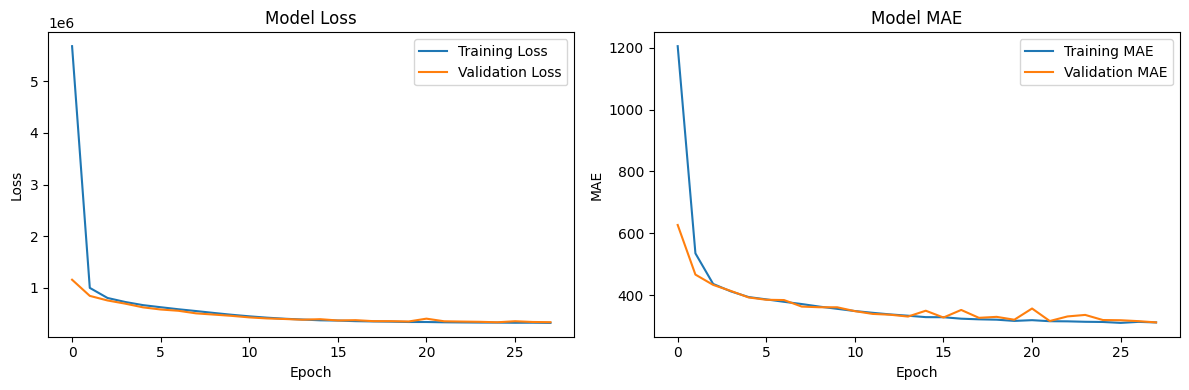

In [14]:
# Plot training history
plot_training_history(history)

337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 300560.0625 - mae: 311.1719 - mape: 10.3915

Test MAE: $308.18
Test MAPE: 10.34%
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step
R-squared Score: 0.9810


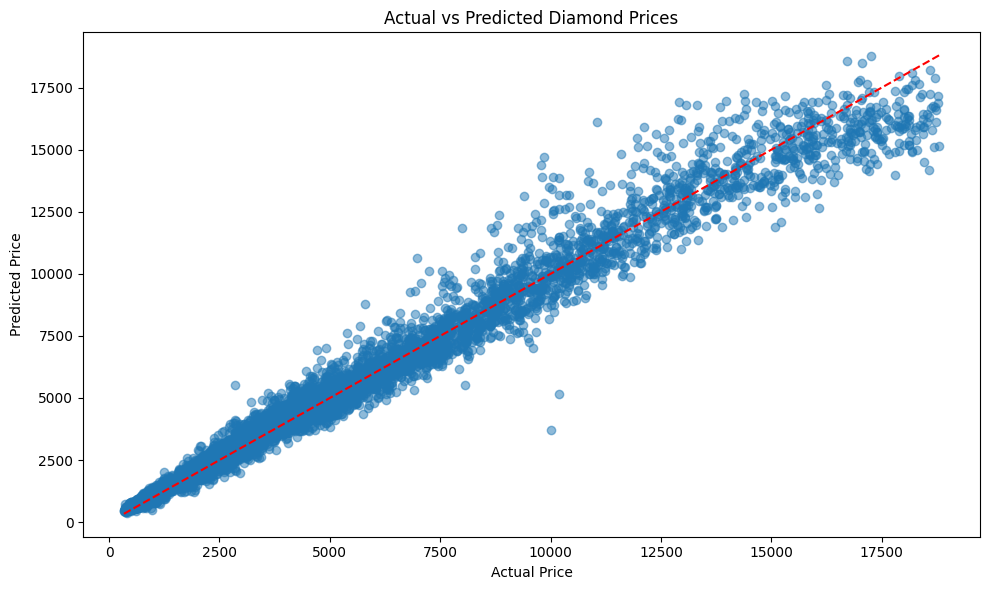

In [15]:
# Evaluate the model
y_pred_orig = evaluate_model(model, X_test, y_test)
residuals_orig = y_test - y_pred_orig

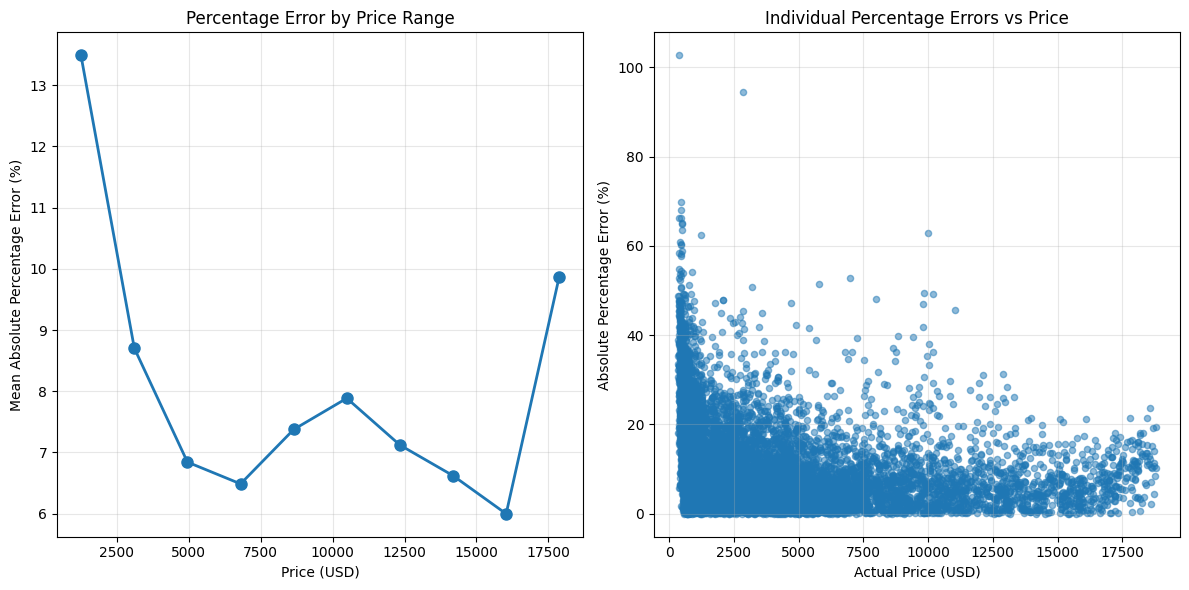


Percentage Error Summary:
Overall MAPE: 10.34%
MAPE for diamonds < $5,000: 11.59%
MAPE for diamonds $5,000-$10,000: 6.72%
MAPE for diamonds > $10,000: 7.30%


In [18]:
# Plot percentage error by price
percentage_errors, bin_centers_actual, bin_errors = plot_percentage_error_by_price(y_test, y_pred_orig)

## Residual Plot
We can see that The residuals are mostly centered around zero, indicating a reasonable fit.  
However, the wider spread at higher prices suggests the model struggles with more expensive diamonds.



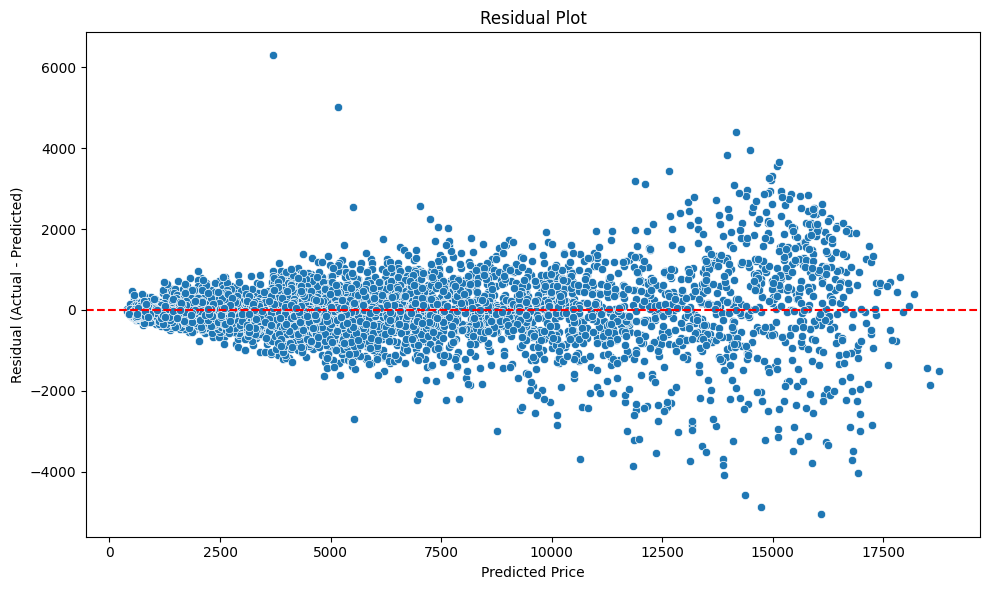

In [17]:
residual_plot(y_test, y_pred_orig)